In [2]:
import numpy as np
import pandas as pd
from astropy import table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt 
from astropy import units as u
from astroquery.xmatch import XMatch
from astropy.table import Table, unique,vstack

In [93]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

In [254]:
data1 = Table.read('xmatch_planets.csv', format='ascii.csv')
data2 = Table.read('xmatch+2.csv', format='ascii.csv')

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1852881933.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 500)


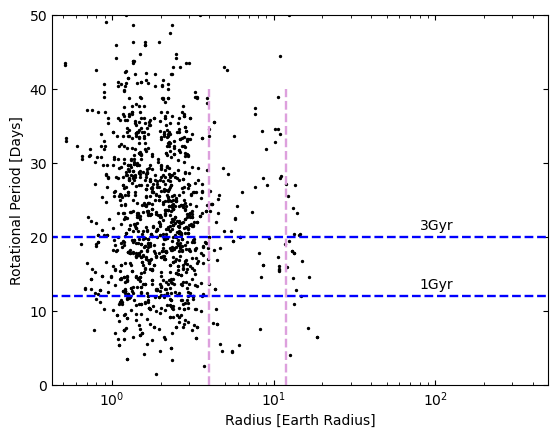

In [95]:
plt.scatter(data1['pl_rade'], data1['Prot'], s = 2, c = 'black') #data1['Teff'])
plt.scatter(data2['pl_rade'], data2['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.scatter(mcquillan_koi['Rp'], mcquillan_koi['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.yscale("log")
plt.xscale("log")
plt.ylim(0,50)
plt.xlim(0, 500)
plt.xlabel("Radius [Earth Radius]")
plt.ylabel("Rotational Period [Days]")
plt.hlines(12, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)
plt.hlines(20, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)

plt.vlines(4, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(12, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)


plt.text(80,13 , "1Gyr")
plt.text(80, 21 , "3Gyr")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

In [255]:
all_data = vstack([data1, data2], join_type='inner')



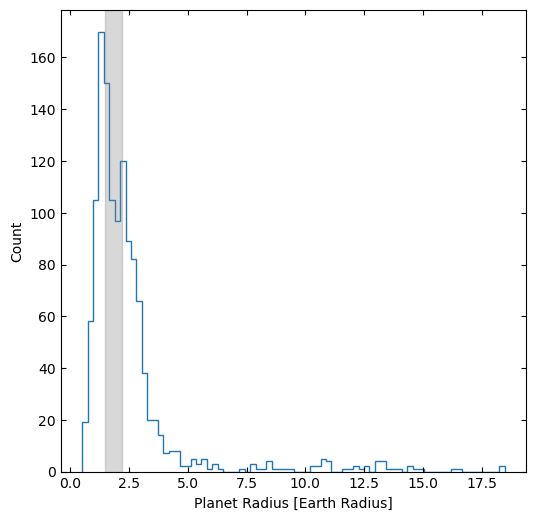

In [97]:
num_bins = freedman_diaconis_bins(all_data['pl_rade'])

## plotando figura

plt.figure(figsize=(6,6))
h, edges = np.histogram(all_data['pl_rade'],bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
#plt.xlim(0,20)

plt.axvspan(1.5, 2.2, alpha=0.3, color='gray')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
plt.show()

In [98]:
plot4 = all_data[all_data['pl_bmasse'] != 0 ]
plot4 = plot4[plot4['pl_dens'] != 0 ]

plot4 = plot4.to_pandas()

plot4 = plot4.dropna(subset=['pl_bmasse', 'pl_dens'])

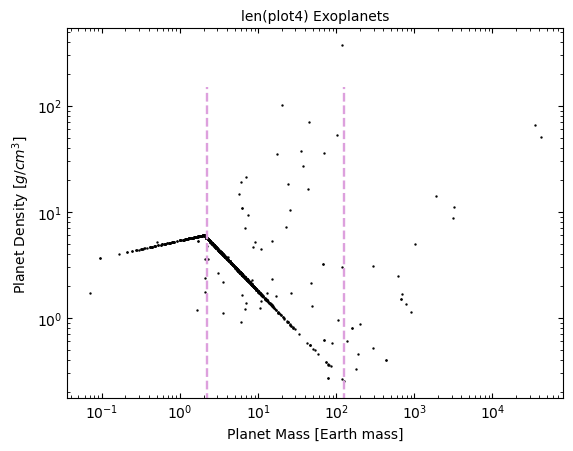

In [99]:
plt.scatter(plot4['pl_bmasse'], plot4['pl_dens'],
           s = 0.5,
           c = 'black')

plt.vlines(127, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(2.2, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.xscale("log")
plt.yscale("log")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel(r'Planet Density $[g/cm^3]$')
plt.title(r"len(plot4) Exoplanets", fontsize = 10)
plt.savefig('mass_densitu.png', dpi=500)

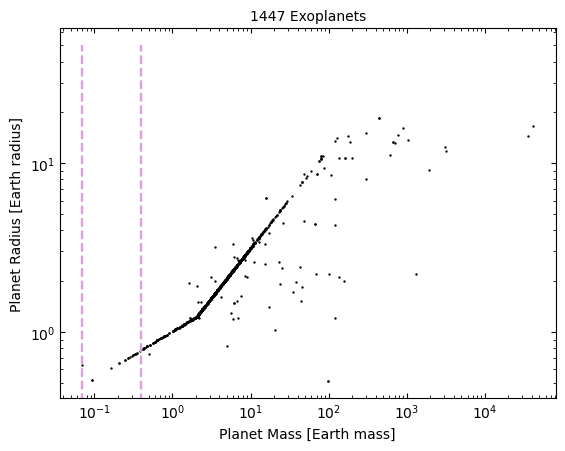

In [100]:
plt.scatter(all_data['pl_bmasse'], all_data['pl_rade'],
           s = 0.5,
           c = 'black')

plt.vlines(0.4, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(0.07, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)

plt.xscale("log")
plt.yscale("log")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel("Planet Radius [Earth radius]")
plt.title("1447 Exoplanets", fontsize = 10)
plt.savefig('mass_radius.png', dpi=500)

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1628860711.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e5)


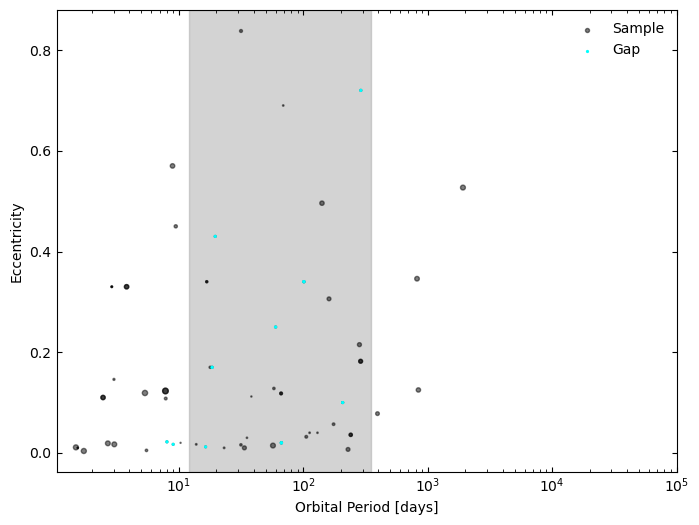

In [101]:
teste = all_data[all_data['pl_orbeccen'] != 0]
res1 = teste[(teste['pl_rade'] > 1.6) & (teste['pl_rade'] < 2.3)]

plt.figure(figsize=(8,6))

plt.axvspan(12, 350, alpha=0.5, color='darkgray')

plt.scatter(teste['pl_orbper'], teste['pl_orbeccen'], s =  teste['pl_radj'] * 10, 
            c = 'black', marker = 'o', alpha = 0.5, label = 'Sample') 

plt.scatter(res1['pl_orbper'], res1['pl_orbeccen'], s =  res1['pl_radj'] * 10, 
            c = 'aqua', marker = 'o', label = 'Gap') 

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.xlim(0,1e5)
plt.xlabel('Orbital Period [days]')
plt.ylabel('Eccentricity')
plt.legend(frameon=False)

plt.savefig('e_vs_orb_sample.png', dpi=500)


plt.show()


In [3]:
Vizier.ROW_LIMIT=-1
mcquillan_koi = Vizier.get_catalogs("J/ApJ/775/L11")[0]

(array([2.009e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.71000000e-01, 2.01295339e+04, 4.02586968e+04, 6.03878597e+04,
        8.05170226e+04, 1.00646185e+05, 1.20775348e+05, 1.40904511e+05,
        1.61033674e+05, 1.81162837e+05, 2.01292000e+05]),
 <BarContainer object of 10 artists>)

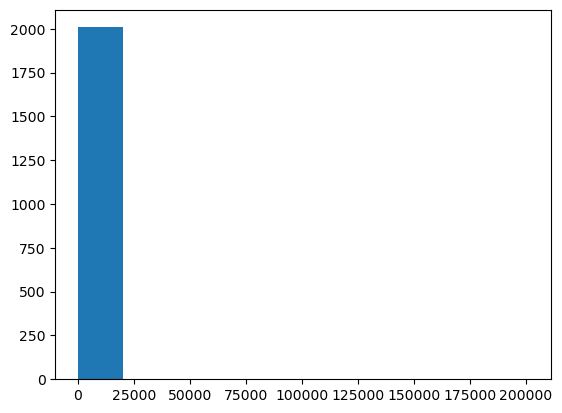

In [3]:
plt.hist(mcquillan_koi['Porb'], bins = 10)

(array([ 63., 149., 196., 179., 100.,  58.,  14.,   1.,   0.,   2.]),
 array([ 0.88599998,  7.42630005, 13.96660042, 20.50690079, 27.04720116,
        33.58750153, 40.12779999, 46.66810226, 53.20840073, 59.748703  ,
        66.28900146]),
 <BarContainer object of 10 artists>)

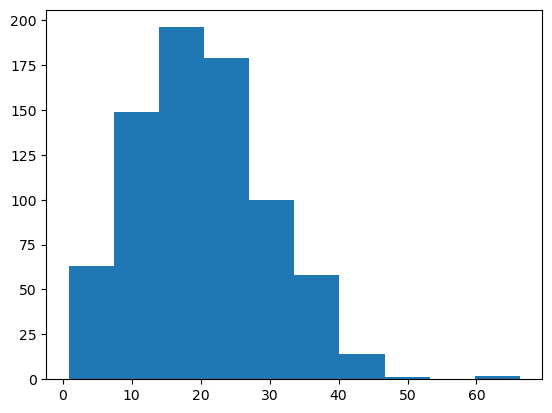

In [4]:
plt.hist(mcquillan_koi['Prot'])

In [4]:
mcquillan_koi = mcquillan_koi.to_pandas()


In [5]:
mcquillan_koi.describe()

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,_RA,_DE
count,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,762.000000,762.000000,762.000000,2010.000000,2010.000000
mean,1582.394527,7.954489e+06,5426.827363,4.494712,3.827677,126.118424,20.248907,0.531134,8.214948,291.302728,44.182720
std,891.676927,2.666484e+06,653.670396,0.253788,6.900168,4489.718814,9.662600,1.255213,9.116926,4.785076,3.645891
min,1.000000,7.574500e+05,3240.000000,2.000000,0.320000,0.371000,0.886000,0.000000,0.180000,280.258390,36.577380
25%,775.250000,5.959728e+06,5086.000000,4.380000,1.500000,4.140500,13.134251,0.014000,3.040000,287.595458,41.241985
50%,1632.500000,8.230156e+06,5542.500000,4.510000,2.140000,9.026500,19.482500,0.060000,6.190000,291.552505,44.130820
75%,2331.750000,1.007002e+07,5843.000000,4.640000,3.000000,21.408750,26.398750,0.255750,11.017500,295.199260,47.050930
max,3147.000000,1.283487e+07,9355.000000,5.260000,89.000000,201292.000000,66.289001,8.057000,166.830002,301.720760,52.149130


(array([ 53., 132., 307., 753., 700.,  53.,   6.,   3.,   0.,   3.]),
 array([3240. , 3851.5, 4463. , 5074.5, 5686. , 6297.5, 6909. , 7520.5,
        8132. , 8743.5, 9355. ]),
 <BarContainer object of 10 artists>)

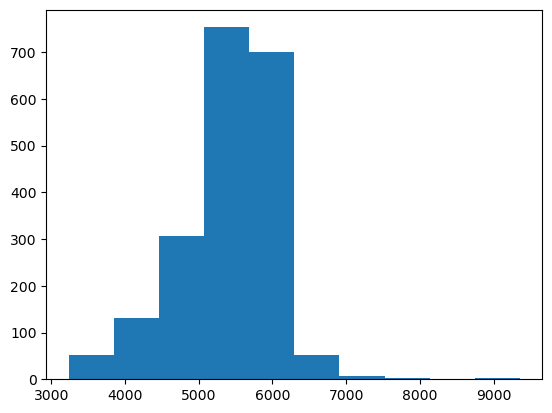

In [7]:
plt.hist(mcquillan_koi['Teff'])

In [8]:
min(mcquillan_koi['Teff'])

3240

In [6]:
mcquillan_koi = mcquillan_koi[mcquillan_koi['Porb'] != 0 ]
mcquillan_koi = mcquillan_koi[mcquillan_koi['Prot'] != 0 ]

#mcquillan_koi = mcquillan_koi.to_pandas()

mcquillan_koi = mcquillan_koi.dropna(subset=['Prot', 'Porb', 'Teff'])
len(mcquillan_koi)

762

In [31]:
#mcquillan_koi = mcquillan_koi[(mcquillan_koi['Rp'] < 2.1) & (mcquillan_koi['Rp'] > 1.7)]

novo = mcquillan_koi[mcquillan_koi['Prot'] >= 1.9*mcquillan_koi['Porb']]
novo = novo[novo['Prot'] <= 2.1*novo['Porb']]

fit_mag = mcquillan_koi[mcquillan_koi['Prot'] >= 3]
fit_mag = fit_mag[fit_mag['Porb'] <= 10]
## erro de +- 2 no porb 2


In [32]:
len(novo)

24

In [12]:
from astroquery.simbad import Simbad


In [13]:
cinc = novo[novo['Prot'] <= 6]
cinc

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
225,882,7377033,5081,4.57,18.00,1.957,3.928,0.0,36.07,T,Simbad,295.83536,42.94306
281,1227,6629332,5452,4.82,28.00,2.155,4.258,0.0,19.01,E,Simbad,297.70712,42.04737
312,1459,9761199,4060,4.40,4.12,0.692,1.383,0.0,4.16,E,Simbad,287.14313,46.50806
382,1812,6279974,6022,4.41,4.80,0.805,1.609,0.0,0.64,T,Simbad,290.12653,41.60108
647,2573,8256453,5102,4.52,6.00,1.348,2.698,0.0,3.99,,Simbad,298.77756,44.11994


In [14]:
result_table_list = pd.DataFrame()  # Create a list to hold the results

In [15]:
from astropy.table import Table


In [16]:
var = 8256453
result_table_1 = Simbad.query_object(f'KIC {var}')
result_table_1 = result_table_1.to_pandas()
    
result_table_list = pd.concat([result_table_list, result_table_1], ignore_index=True)  # Append the result to the list

result_table_list

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
0,KOI-2573,19 55 06.6117,+44 07 11.797,14,14,0.0255,0.0269,90,A,O,2020yCat.1350....0G,1


In [17]:
cinc

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
225,882,7377033,5081,4.57,18.00,1.957,3.928,0.0,36.07,T,Simbad,295.83536,42.94306
281,1227,6629332,5452,4.82,28.00,2.155,4.258,0.0,19.01,E,Simbad,297.70712,42.04737
312,1459,9761199,4060,4.40,4.12,0.692,1.383,0.0,4.16,E,Simbad,287.14313,46.50806
382,1812,6279974,6022,4.41,4.80,0.805,1.609,0.0,0.64,T,Simbad,290.12653,41.60108
647,2573,8256453,5102,4.52,6.00,1.348,2.698,0.0,3.99,,Simbad,298.77756,44.11994


In [18]:
cinc = cinc.sort_values(by='Prot', ascending=False)
cinc


,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
281,1227,6629332,5452,4.82,28.00,2.155,4.258,0.0,19.01,E,Simbad,297.70712,42.04737
225,882,7377033,5081,4.57,18.00,1.957,3.928,0.0,36.07,T,Simbad,295.83536,42.94306
647,2573,8256453,5102,4.52,6.00,1.348,2.698,0.0,3.99,,Simbad,298.77756,44.11994
382,1812,6279974,6022,4.41,4.80,0.805,1.609,0.0,0.64,T,Simbad,290.12653,41.60108
312,1459,9761199,4060,4.40,4.12,0.692,1.383,0.0,4.16,E,Simbad,287.14313,46.50806


In [38]:
cinc_1prot = mcquillan_koi[mcquillan_koi['Prot'] >= 0.8*mcquillan_koi['Porb']]
cinc_1prot = cinc_1prot[cinc_1prot['Prot'] <= 1.2*cinc_1prot['Porb']]
#cinc_1prot = cinc_1prot[cinc_1prot['Prot'] <= 5.5]

cinc_1prot = cinc_1prot.sort_values(by='Prot', ascending=False)

len(cinc_1prot)


77

In [20]:
len(cinc_1prot)

9

In [21]:
x_2 = np.linspace(0, 50, 100)
y_2 = 2*x_2

x = np.linspace(0, 50, 100)


In [22]:
#plt.plot(x,x, ls = '--', c = 'gray', alpha = 0.5)
#plt.plot(x_2,y_2, ls = '--', c = 'gray', alpha = 0.5)

C:\Users\ylana\AppData\Local\Temp\ipykernel_7812\377468714.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,90)


AttributeError: 'NoneType' object has no attribute 'legend'

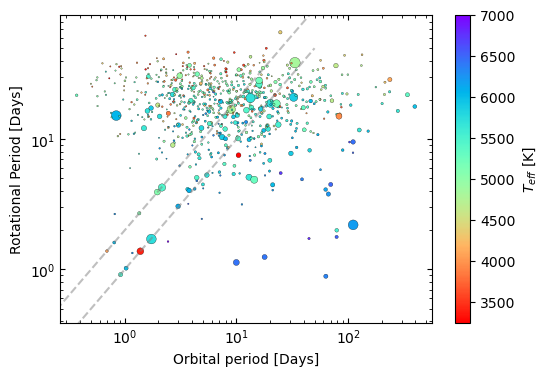

In [ ]:
plt.figure(figsize=(6,4))
#plt.scatter(cinc_1prot['Porb'], cinc_1prot['Prot'], s = 10 , c = 'black', ec = 'black', lw = 0.2)
#plt.scatter(novo['Porb'], novo['Prot'], s = 10 , c = 'black', ec = 'black', lw = 0.2)

fig = plt.scatter(mcquillan_koi['Porb'], mcquillan_koi['Prot'], s = mcquillan_koi['Rp'] ,cmap = 'rainbow_r', c = mcquillan_koi['Teff'], ec = 'black', lw = 0.2, alpha = 1).set_clim(3250, 7000) #data2['Teff'])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

plt.plot(x,x, ls = '--', c = 'gray', alpha = 0.5)
plt.plot(x_2,y_2, ls = '--', c = 'gray', alpha = 0.5)
plt.ylim(0,90)

#plt.legend(*fig.legend("sizes", num=3))

plt.savefig('orb_vs_prot_1x_sample.png', dpi=500)


In [117]:
mcquillan_koi[mcquillan_koi['Prot'] < 2]

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
1,12,5812701,6419,4.26,13.40,17.855,1.245,0.124,0.780000,,Simbad,297.45374,41.01099
11,100,4055765,6440,3.69,19.00,9.966,1.131,0.000,0.850000,,Simbad,291.17792,39.19949
45,256,11548140,3410,4.90,24.00,1.379,1.379,0.000,47.740002,E,Simbad,285.18512,49.56537
206,823,5115978,5976,4.43,8.70,1.028,1.022,0.000,8.600000,E,Simbad,296.00699,40.29543
282,1255,8494263,5521,4.79,7.20,78.925,1.998,0.001,4.580000,C,Simbad,291.44522,44.52869
312,1459,9761199,4060,4.40,4.12,0.692,1.383,0.000,4.160000,E,Simbad,287.14313,46.50806
326,1546,5475431,5505,4.97,9.50,0.918,0.913,0.000,15.200000,E,Simbad,298.51370,40.63962
353,1701,7222086,7065,4.07,1.73,2.439,1.637,0.000,0.370000,,Simbad,297.51907,42.77706
374,1799,6058614,5735,4.61,49.00,1.731,1.711,0.000,30.309999,T,Simbad,296.30573,41.31712
382,1812,6279974,6022,4.41,4.80,0.805,1.609,0.000,0.640000,T,Simbad,290.12653,41.60108


In [118]:
temp1 = mcquillan_koi[(mcquillan_koi['Teff'] < 4000) & (mcquillan_koi['Teff'] > 0)]
temp2 = mcquillan_koi[(mcquillan_koi['Teff'] < 5000) & (mcquillan_koi['Teff'] > 4000)]
temp3 = mcquillan_koi[(mcquillan_koi['Teff'] < 6000) & (mcquillan_koi['Teff'] > 5000)]
temp4 = mcquillan_koi[mcquillan_koi['Teff'] > 6000]

In [258]:
len(mcquillan_koi)

762

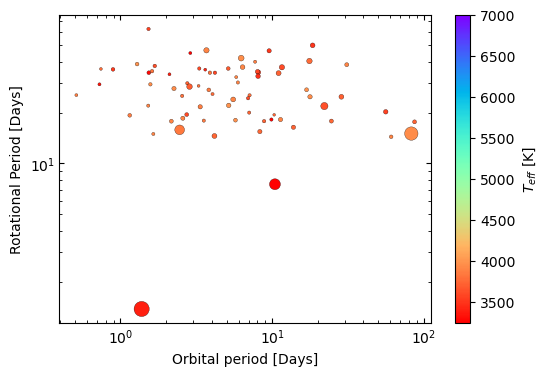

In [119]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')


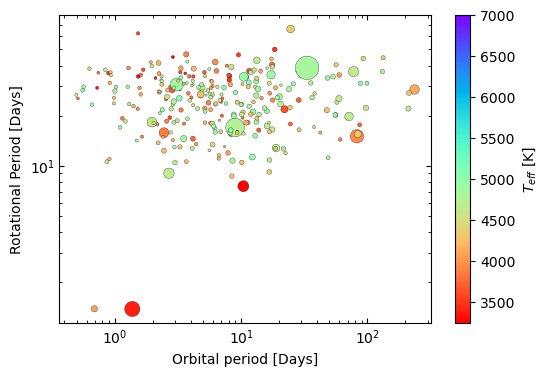

In [120]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp']*5 ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

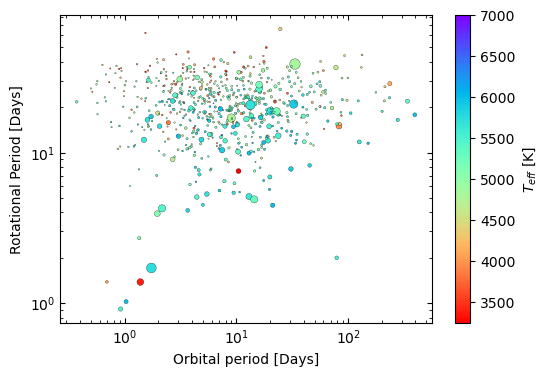

In [121]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

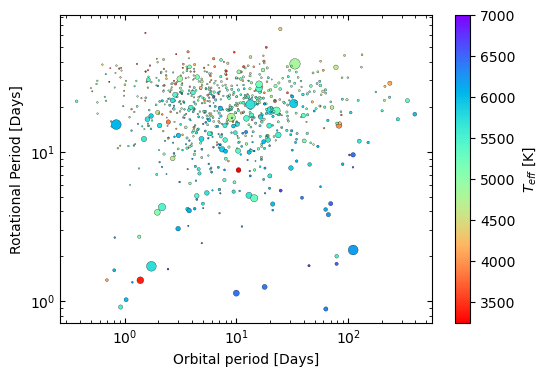

In [122]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp4['Porb'], temp4['Prot'], s = temp4['Rp'] ,cmap = 'rainbow_r', c = temp4['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)


plt.colorbar(label = r'$T_{eff}$ [K]')

In [256]:
sample = all_data[all_data['pl_orbper'] != 0]
sample = sample[sample['st_rotp'] != 0]

sample = sample.to_pandas()


sample = sample.dropna(subset=[ 'pl_orbper', 'st_rotp'])


In [136]:
sample_mini = all_data[(all_data['pl_rade'] > 1.8) & (all_data['pl_rade'] < 2.2)]

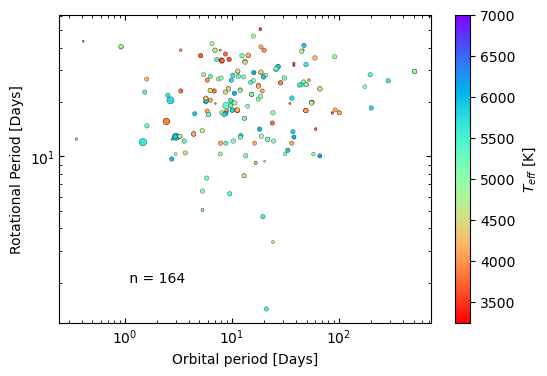

In [252]:
plt.figure(figsize=(6,4))
plt.scatter(sample['pl_orbper'], sample['Prot'], s = sample['pl_rade']*2 ,cmap = 'rainbow_r', c = sample['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(sample_mini['pl_orbper'], sample_mini['Prot'], s = sample_mini['pl_rade']*5 ,cmap = 'rainbow_r', c = sample_mini['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(sample_mini) }",[1,2],fontsize=10)


plt.colorbar(label = r'$T_{eff}$ [K]')

In [239]:
sample_mini['st_age']

idade = sample_mini[sample_mini['st_age'] != 0 ]

idade = idade.to_pandas()

idade = idade.dropna(subset=['st_age'])



0      3.16
1      1.86
2      4.79
3      3.72
4      8.71
       ... 
159    4.47
160    2.29
161    2.79
162    3.98
163    3.16
Name: st_age, Length: 161, dtype: float64

In [243]:
idade['st_age'].describe()

count    161.000000
mean       4.291894
std        2.926537
min        0.105000
25%        2.950000
50%        3.890000
75%        4.570000
max       14.000000
Name: st_age, dtype: float64

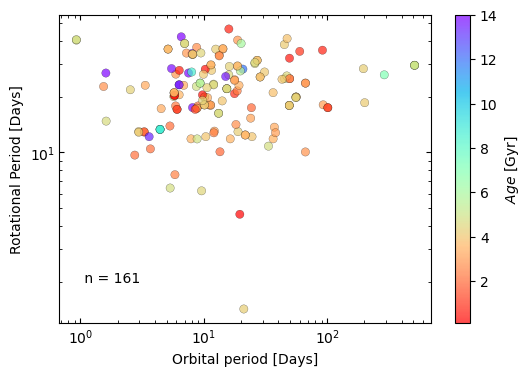

In [277]:
plt.figure(figsize=(6,4))
#plt.scatter(sample['pl_orbper'], sample['Prot'], s = sample['pl_rade']*2 ,cmap = 'rainbow_r', c = sample['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(idade['pl_orbper'], idade['Prot'] ,cmap = 'rainbow_r', c = idade['st_age'], alpha = 0.7, ec = 'black', lw = 0.2, ) #data2['Teff'])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(idade) }",[1,2],fontsize=10)


plt.colorbar(label = r'$Age$ [Gyr]')

plt.savefig('ages', dpi=500)


In [286]:
sample_primordial = pd.read_csv('all_planets.csv')
plot5 = sample_primordial[sample_primordial['st_age'] != 0]

In [288]:
res1 = plot5[plot5['pl_bmassj'] < 6e-3]
res2 = plot5[(plot5['pl_bmassj'] > 6.311e-3) & (plot5['pl_bmassj'] < 0.408)]
res3 = plot5[(plot5['pl_bmassj'] > 0.4) & (plot5['pl_bmassj'] < 29.041)]
gap = plot5[(plot5['pl_rade'] > 1.7) & (plot5['pl_rade'] < 2.2)]

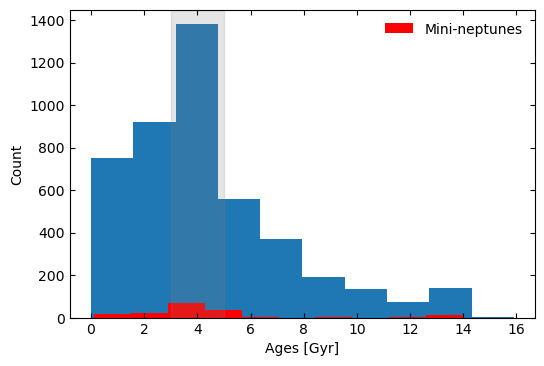

In [285]:
plt.figure(figsize=(6,4))

plt.hist(all_age['st_age'])
plt.hist(idade['st_age'], label = 'Mini-neptunes', color = 'red')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel('Ages [Gyr]')
plt.ylabel('Count')

plt.axvspan(3, 5, alpha=0.2, color='gray')


plt.legend(frameon = False)

plt.savefig('hist_ages', dpi=500)



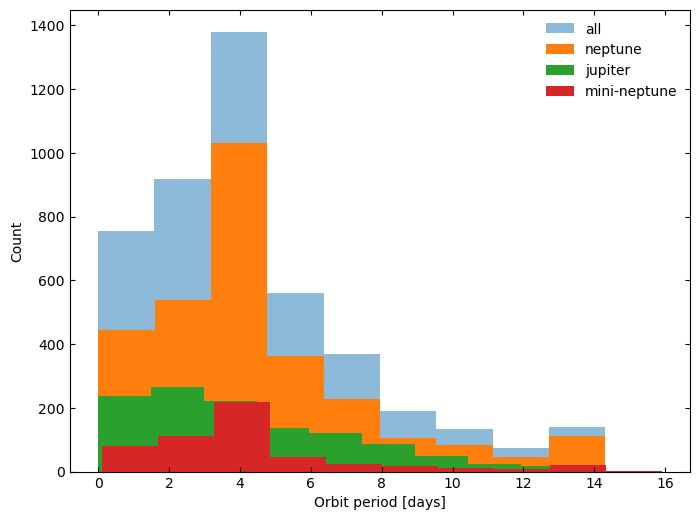

In [295]:
fig = plt.figure(figsize=(8, 6))

plt.hist(plot5['st_age'], alpha = .5, label = 'all')
plt.hist(res2['st_age'], alpha = 1, label = 'neptune')
plt.hist(res3['st_age'], alpha = 1, label ='jupiter')


plt.hist(gap['st_age'], alpha = 1, label = 'mini-neptune')
#plt.hist(res1['pl_orbper'],bins = bins_orb2, alpha = 1, label = 'earth')

#plt.axvspan(9, 4, alpha=0.5, color='darkgray')

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel('Orbit period [days]')
plt.ylabel('Count')
plt.legend(frameon=False)


## jupiter eh diferente

In [192]:
sample_primordial = pd.read_csv('all_planets.csv')

sample_primordial.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5756.000000,5756.000000,5756.000000,5756.000000,5.480000e+03,4.979000e+03,4.979000e+03,5480.000000,5475.000000,2863.000000,...,5422.000000,5517.000000,5509.000000,5503.000000,5526.000000,5490.000000,5478.000000,5469.000000,5467.000000,5467.000000
mean,1.104065,1.766157,2016.415566,0.005212,7.805236e+04,9.612077e+04,-2.195251e+04,-0.000730,16.039629,2.356508,...,-0.052833,12.605862,0.100670,-0.102275,10.463569,0.042592,-0.042613,12.319828,0.000642,-0.000642
std,0.344414,1.150624,4.651429,0.072012,5.432986e+06,6.661132e+06,1.419306e+06,0.038205,359.828197,97.483155,...,0.260714,3.088077,0.138744,0.207147,3.022716,0.261055,0.267160,2.985630,0.001822,0.001822
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-16.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232
25%,1.000000,1.000000,2014.000000,0.000000,4.417637e+00,1.400000e-05,-1.572000e-03,0.000000,0.052900,0.000860,...,-0.045338,10.769000,0.030000,-0.126000,8.449000,0.020000,-0.031000,10.454000,0.000257,-0.000538
50%,1.000000,1.000000,2016.000000,0.000000,1.139097e+01,9.392000e-05,-9.543000e-05,0.000000,0.102900,0.002700,...,-0.030159,13.403000,0.080000,-0.080000,11.311500,0.023000,-0.023000,13.148000,0.000364,-0.000364
75%,1.000000,2.000000,2020.000000,0.000000,4.043137e+01,1.552000e-03,-1.400000e-05,0.000000,0.300400,0.034000,...,-0.022198,14.986000,0.126000,-0.030000,12.814000,0.031000,-0.020000,14.755500,0.000538,-0.000257
max,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,5205.000000,...,-0.011737,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118


In [224]:

sample = sample_primordial[sample_primordial['pl_rade'] > 1.7 ]
sample = sample[sample['pl_rade'] < 2.1 ]
sample = sample[sample['pl_orbeccen'] != 0 ]

In [225]:
sample = sample.dropna(subset= ['st_age', 'pl_orbeccen'])

In [226]:
sample['st_age'].describe()

count    68.000000
mean      5.578088
std       3.619290
min       0.105000
25%       3.000000
50%       5.000000
75%       7.975000
max      13.900000
Name: st_age, dtype: float64

(array([ 9.,  7., 11., 16.,  6.,  2.,  4.,  7.,  3.,  3.]),
 array([ 0.105 ,  1.4845,  2.864 ,  4.2435,  5.623 ,  7.0025,  8.382 ,
         9.7615, 11.141 , 12.5205, 13.9   ]),
 <BarContainer object of 10 artists>)

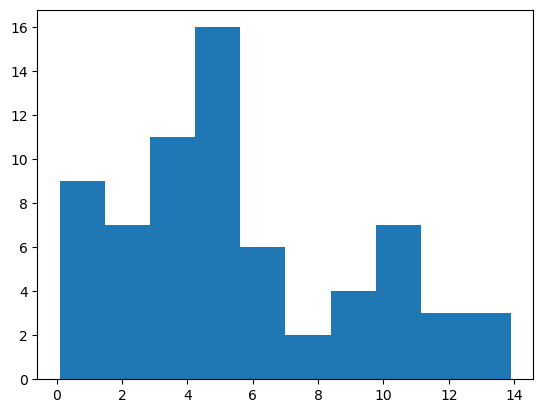

In [232]:
sample['st_age']

plt.hist(sample['st_age'])
#plt.yscale('log')
#plt.xscale('log')




In [212]:
sample['pl_orbeccen']

35      0.050
133     0.070
159     0.060
173     0.000
179     0.060
        ...  
5696    0.409
5738    0.077
5744    0.126
5746    0.180
5747    0.160
Name: pl_orbeccen, Length: 419, dtype: float64

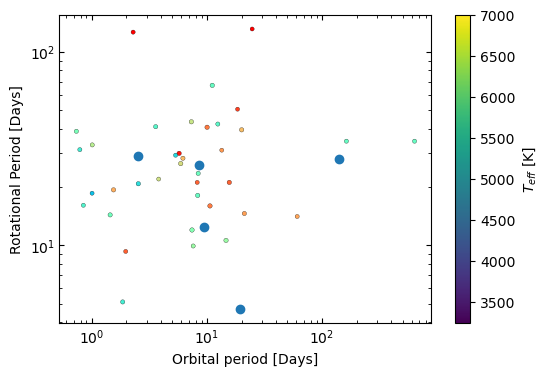

In [198]:
plt.figure(figsize=(6,4))
plt.scatter(sample['pl_orbper'], sample['st_rotp'], s = sample['pl_rade']*5 ,cmap = 'rainbow_r', c = sample['st_teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
#plt.scatter(sample_mini['pl_orbper'], sample_mini['Prot'], s = sample_mini['pl_rade']*5 ,cmap = 'rainbow_r', c = sample_mini['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(ages['pl_orbper'], ages['st_rotp']).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(sample) }",[1,2],fontsize=10)


plt.colorbar(label = r'$T_{eff}$ [K]')

In [7]:
#new_netunos = sample[sample['pl_orbeccen'] > 0.2]
#new_netunos

In [180]:
ages = new_netunos[new_netunos['st_age'] != 0]
ages = ages[ages['st_age'] < 7]

ages = ages.dropna(subset=['st_age'])


ages


,pl_name,hostname,pl_letter,hd_name,tic_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_refname,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
273,GJ 514 b,GJ 514,b,NaN,TIC 404519959,1,1,Radial Velocity,2022,<a refstr=DAMASSO_ET_AL__2022 href=https://ui....,...,-0.054277,9.050,0.100,-0.100,5.036,0.027,-0.027,8.20621,0.000711,-0.000711
880,HD 20794 e,HD 20794,e,HD 20794,TIC 301051051,1,4,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,...,-0.234780,4.260,0.030,-0.030,2.636,0.278,-0.278,4.06635,0.005102,-0.005102
990,HD 28109 b,HD 28109,b,HD 28109,TIC 29781292,1,3,Transit,2022,<a refstr=DRANSFIELD_ET_AL__2022 href=https://...,...,-0.021784,9.420,0.030,-0.030,8.175,0.023,-0.023,9.29976,0.000323,-0.000323
1228,HD 93385 b,HD 93385,b,HD 93385,TIC 106900981,1,3,Radial Velocity,2021,<a refstr=UNGER_ET_AL__2021 href=https://ui.ad...,...,-0.034248,7.490,0.030,-0.030,6.065,0.023,-0.023,7.33769,0.000156,-0.000156
3256,Kepler-1928 b,Kepler-1928,b,NaN,TIC 122450696,1,1,Transit,2021,<a refstr=VALIZADEGAN_ET_AL__2022 href=https:/...,...,-0.022877,12.679,0.069,-0.069,11.107,0.019,-0.019,12.61820,0.000651,-0.000651
3990,Kepler-440 b,Kepler-440,b,NaN,TIC 120495880,1,1,Transit,2015,<a refstr=TORRES_ET_AL__2015 href=https://ui.a...,...,-0.024949,15.637,0.172,-0.172,12.121,0.021,-0.021,15.10580,0.000380,-0.000380
4239,Kepler-61 b,Kepler-61,b,NaN,TIC 271537530,1,1,Transit,2013,<a refstr=BALLARD_ET_AL__2013 href=https://ui....,...,-0.043556,15.277,0.069,-0.069,12.272,0.019,-0.019,15.04260,0.001305,-0.001305
5107,TOI-1470 b,TOI-1470,b,NaN,TIC 284441182,1,2,Transit,2023,<a refstr=GONZ_AACUTE_LEZ__AACUTE_LVAREZ_ET_AL...,...,-0.027398,13.459,0.036,-0.036,9.283,0.020,-0.020,12.55550,0.000285,-0.000285
5121,TOI-1670 b,TOI-1670,b,NaN,TIC 441739020,1,2,Transit,2022,<a refstr=TRAN_ET_AL__2022 href=https://ui.ads...,...,-0.024141,9.889,0.004,-0.004,8.724,0.018,-0.018,9.81934,0.000370,-0.000370
5241,TOI-238 c,TOI-238,c,NaN,TIC 9006668,1,2,Radial Velocity,2024,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,...,-0.040754,10.748,0.013,-0.013,8.598,0.021,-0.021,10.48830,0.000367,-0.000367


In [13]:
pl_age = pd.read_csv(r'C:\Users\ylana\Downloads\confirmed_pl_age.csv')

In [17]:
pl_age.columns

Index(['Unnamed: 0', 'angDist', 'col1', 'KOI', 'KIC', 'Teff', 'log_g_', 'Rp',
       'Porb', 'Prot', 'e_Prot', 'Rvar', 'Flag', 'Simbad', '_RA', '_DE',
       'radius_category', 'point_size', 'kepid', 'kepler_name',
       'koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'ra', 'dec',
       'B-V', '$Age_{gyro}$'],
      dtype='object')

C:\Users\ylana\AppData\Local\Temp\ipykernel_25192\290701002.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,150)
C:\Users\ylana\AppData\Local\Temp\ipykernel_25192\290701002.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,51)


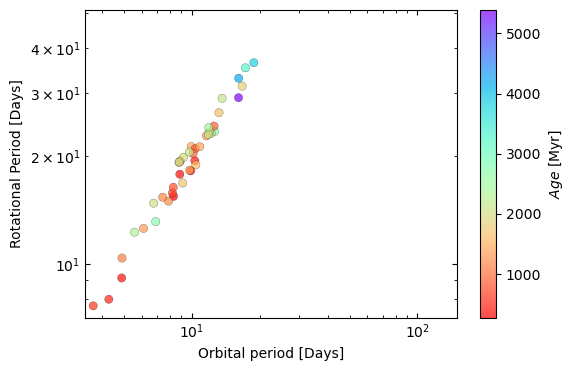

In [26]:
plt.figure(figsize=(6,4))
#plt.scatter(sample['pl_orbper'], sample['Prot'], s = sample['pl_rade']*2 ,cmap = 'rainbow_r', c = sample['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(pl_age['Porb'], pl_age['Prot'] ,cmap = 'rainbow_r', c = pl_age['$Age_{gyro}$'], alpha = 0.7, ec = 'black', lw = 0.2, ) #data2['Teff'])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(pl_age) }",[1,2],fontsize=10)
plt.xlim(0,150)
plt.ylim(0,51)



plt.colorbar(label = r'$Age$ [Myr]')